In [1]:
import pandas as pd
import numpy as np
import scipy


file='Data/Dataset3-Durum Wheat Features/Durum Wheat Features.xlsx'



Df=pd.read_excel(file)


In [2]:
Df.head()


,Target,AREA,MAJORAXIS,MINORAXIS,ECCENTRICITY,EQDIASQ,PERIMETER,SOLIDITY,ROUNDNESS,SHAPEFACTOR,...,Gabor_Y9(XYZ),Gabor_Z1(XYZ),Gabor_Z2(XYZ),Gabor_Z3(XYZ),Gabor_Z4(XYZ),Gabor_Z5(XYZ),Gabor_Z6(XYZ),Gabor_Z7(XYZ),Gabor_Z8(XYZ),Gabor_Z9(XYZ)
0,Vitreous,168,109.576157,39.396721,0.973060,213.904236,202.794052,0.087454,0.017815,0.051334,...,1.187631,0.003489,0.013901,0.031153,0.003591,0.014329,0.032405,0.235286,0.651593,0.775182
1,Vitreous,162,105.584457,43.366894,0.964173,206.264801,194.794052,0.081901,0.018502,0.053650,...,2.437782,0.003794,0.015126,0.033886,0.004166,0.016921,0.038586,0.368535,1.074773,1.577847
2,Vitreous,145,97.360207,35.532028,0.903072,184.619720,177.722961,0.096026,0.019477,0.057689,...,0.527286,0.003069,0.012269,0.027538,0.003092,0.012459,0.028380,0.111476,0.191517,0.350966
3,Vitreous,178,104.080582,49.040062,1.272657,226.636627,202.509750,0.080507,0.020921,0.054543,...,2.277434,0.003743,0.014940,0.033508,0.003966,0.015513,0.034776,0.180135,0.887808,1.446794
4,Vitreous,187,103.716667,40.885876,-1.469139,238.095779,198.811234,0.097650,0.022134,0.059452,...,2.337524,0.003599,0.014423,0.032525,0.003922,0.015026,0.034003,0.199192,0.928664,1.786701


In [3]:
#drop a bunch of columns for now, not sure of the meeaning
Df = Df.drop(Df.filter(regex='Gabor').columns, axis=1)
Df = Df.drop(Df.filter(regex='db').columns, axis=1)
Df = Df.drop(Df.filter(regex='XYZ').columns, axis=1)

print(Df.shape)
ll=sorted(list(Df.columns))
for l in ll:
    print(l)


(9000, 72)
AREA
COMPACTNESS
ECCENTRICITY
EQDIASQ
EXTENT
MAJORAXIS
MINORAXIS
PERIMETER
ROUNDNESS
SHAPEFACTOR
SOLIDITY
StdDev_B
StdDev_Cb
StdDev_Cr
StdDev_G
StdDev_H
StdDev_L
StdDev_R
StdDev_S
StdDev_V
StdDev_Y
StdDev_a*
StdDev_b*
Target
entropyL
entropy_B
entropy_Cb
entropy_Cr
entropy_G
entropy_H
entropy_R
entropy_S
entropy_V
entropy_Y
entropy_a*
entropy_b*
kurtosis_B
kurtosis_Cb
kurtosis_Cr
kurtosis_G
kurtosis_H
kurtosis_L
kurtosis_R
kurtosis_S
kurtosis_V
kurtosis_Y
kurtosis_a*
kurtosis_b*
mean_B
mean_Cb
mean_Cr
mean_G
mean_H
mean_L
mean_R
mean_S
mean_V
mean_Y
mean_a*
mean_b*
skew_B
skew_Cb
skew_Cr
skew_G
skew_H
skew_L
skew_R
skew_S
skew_V
skew_Y
skew_a*
skew_b*


In [4]:


#print(y)
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X=Df.drop('Target',axis=1)
y=Df['Target']

# transform y before splitting
#y_encoder=OrdinalEncoder()
#Df['Target']=y_encoder.fit_transform(Df)
#print(Df['Target'])

#label encoder is specific for label, Ordinal encoder could apply encoding on hidder features
y_encoder=LabelEncoder()
y=y_encoder.fit_transform(y)


# split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


print(X_train.shape)



(6300, 71)


In [5]:
#feature engineering 
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

toencode=X_train.select_dtypes(include=['category','object']).columns

if len(toencode)==0:
    print ('OneHot encoding not needed')



#Both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.
# as there are a large number of features, I dont want to check outlier for each outlier, -> robust scaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)    

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)



# PCA remove mean, but does not apply any scaler... so normalisation is done before
pca=PCA(n_components=10).fit(X_train)

print(pca.explained_variance_ratio_*100)


# COnsider here that some part of the signal is 'noise'. something like 90% is explained -> I take 8 features in PCA space
ncomp=8
percexplained=np.sum(pca.explained_variance_ratio_[:ncomp]*100)
print( str(ncomp) +' features chosen, i.e ' + '{:0.2f}'.format(percexplained) + '% of total variance')


mypca=PCA(n_components=ncomp).fit(X_train)
train_reduced=mypca.transform(X_train)

#### reduce X test too, with same the same operations (SVD decomp and rescaling!)
mypca=PCA(n_components=ncomp).fit(X_test)
test_reduced=mypca.transform(X_test) #PCA! is build on Xtrain!


OneHot encoding not needed
[37.7643211  25.4999563   8.94366384  5.48539814  3.84404196  3.76397649
  2.86795015  1.98344013  1.37986875  1.14467229]
8 features chosen, i.e 90.15% of total variance


In [6]:

#naive bayse categorical need postivie values in X train and X test so use MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# however Xtrain_reduced come from an SVD decomposition which should be is orthogonal
# I am not sure if rescaling remove orthognal properties!
scaler=MinMaxScaler()
X_train_reduced=scaler.fit_transform(train_reduced)
X_test_reduced=scaler.fit_transform(test_reduced)

#transform into dataframe
X_train_reduced=pd.DataFrame(X_train_reduced)
X_test_reduced=pd.DataFrame(X_test_reduced)

          0         1         2         3         4         5         6  \
0  0.378617  0.891173  0.698937  0.249287  0.342775  0.439753  0.620367   
1  0.404151  0.860382  0.647861  0.257723  0.393168  0.474982  0.417655   
2  0.377862  0.698154  0.540628  0.190666  0.333475  0.318647  0.272652   
3  0.381923  0.793274  0.557534  0.212879  0.298931  0.242673  0.361637   
4  0.371741  0.934796  0.766541  0.369632  0.394945  0.351225  0.315752   

          7    target  
0  0.386567  Vitreous  
1  0.468803  Vitreous  
2  0.422478   Starchy  
3  0.493070   Starchy  
4  0.513102  Vitreous  


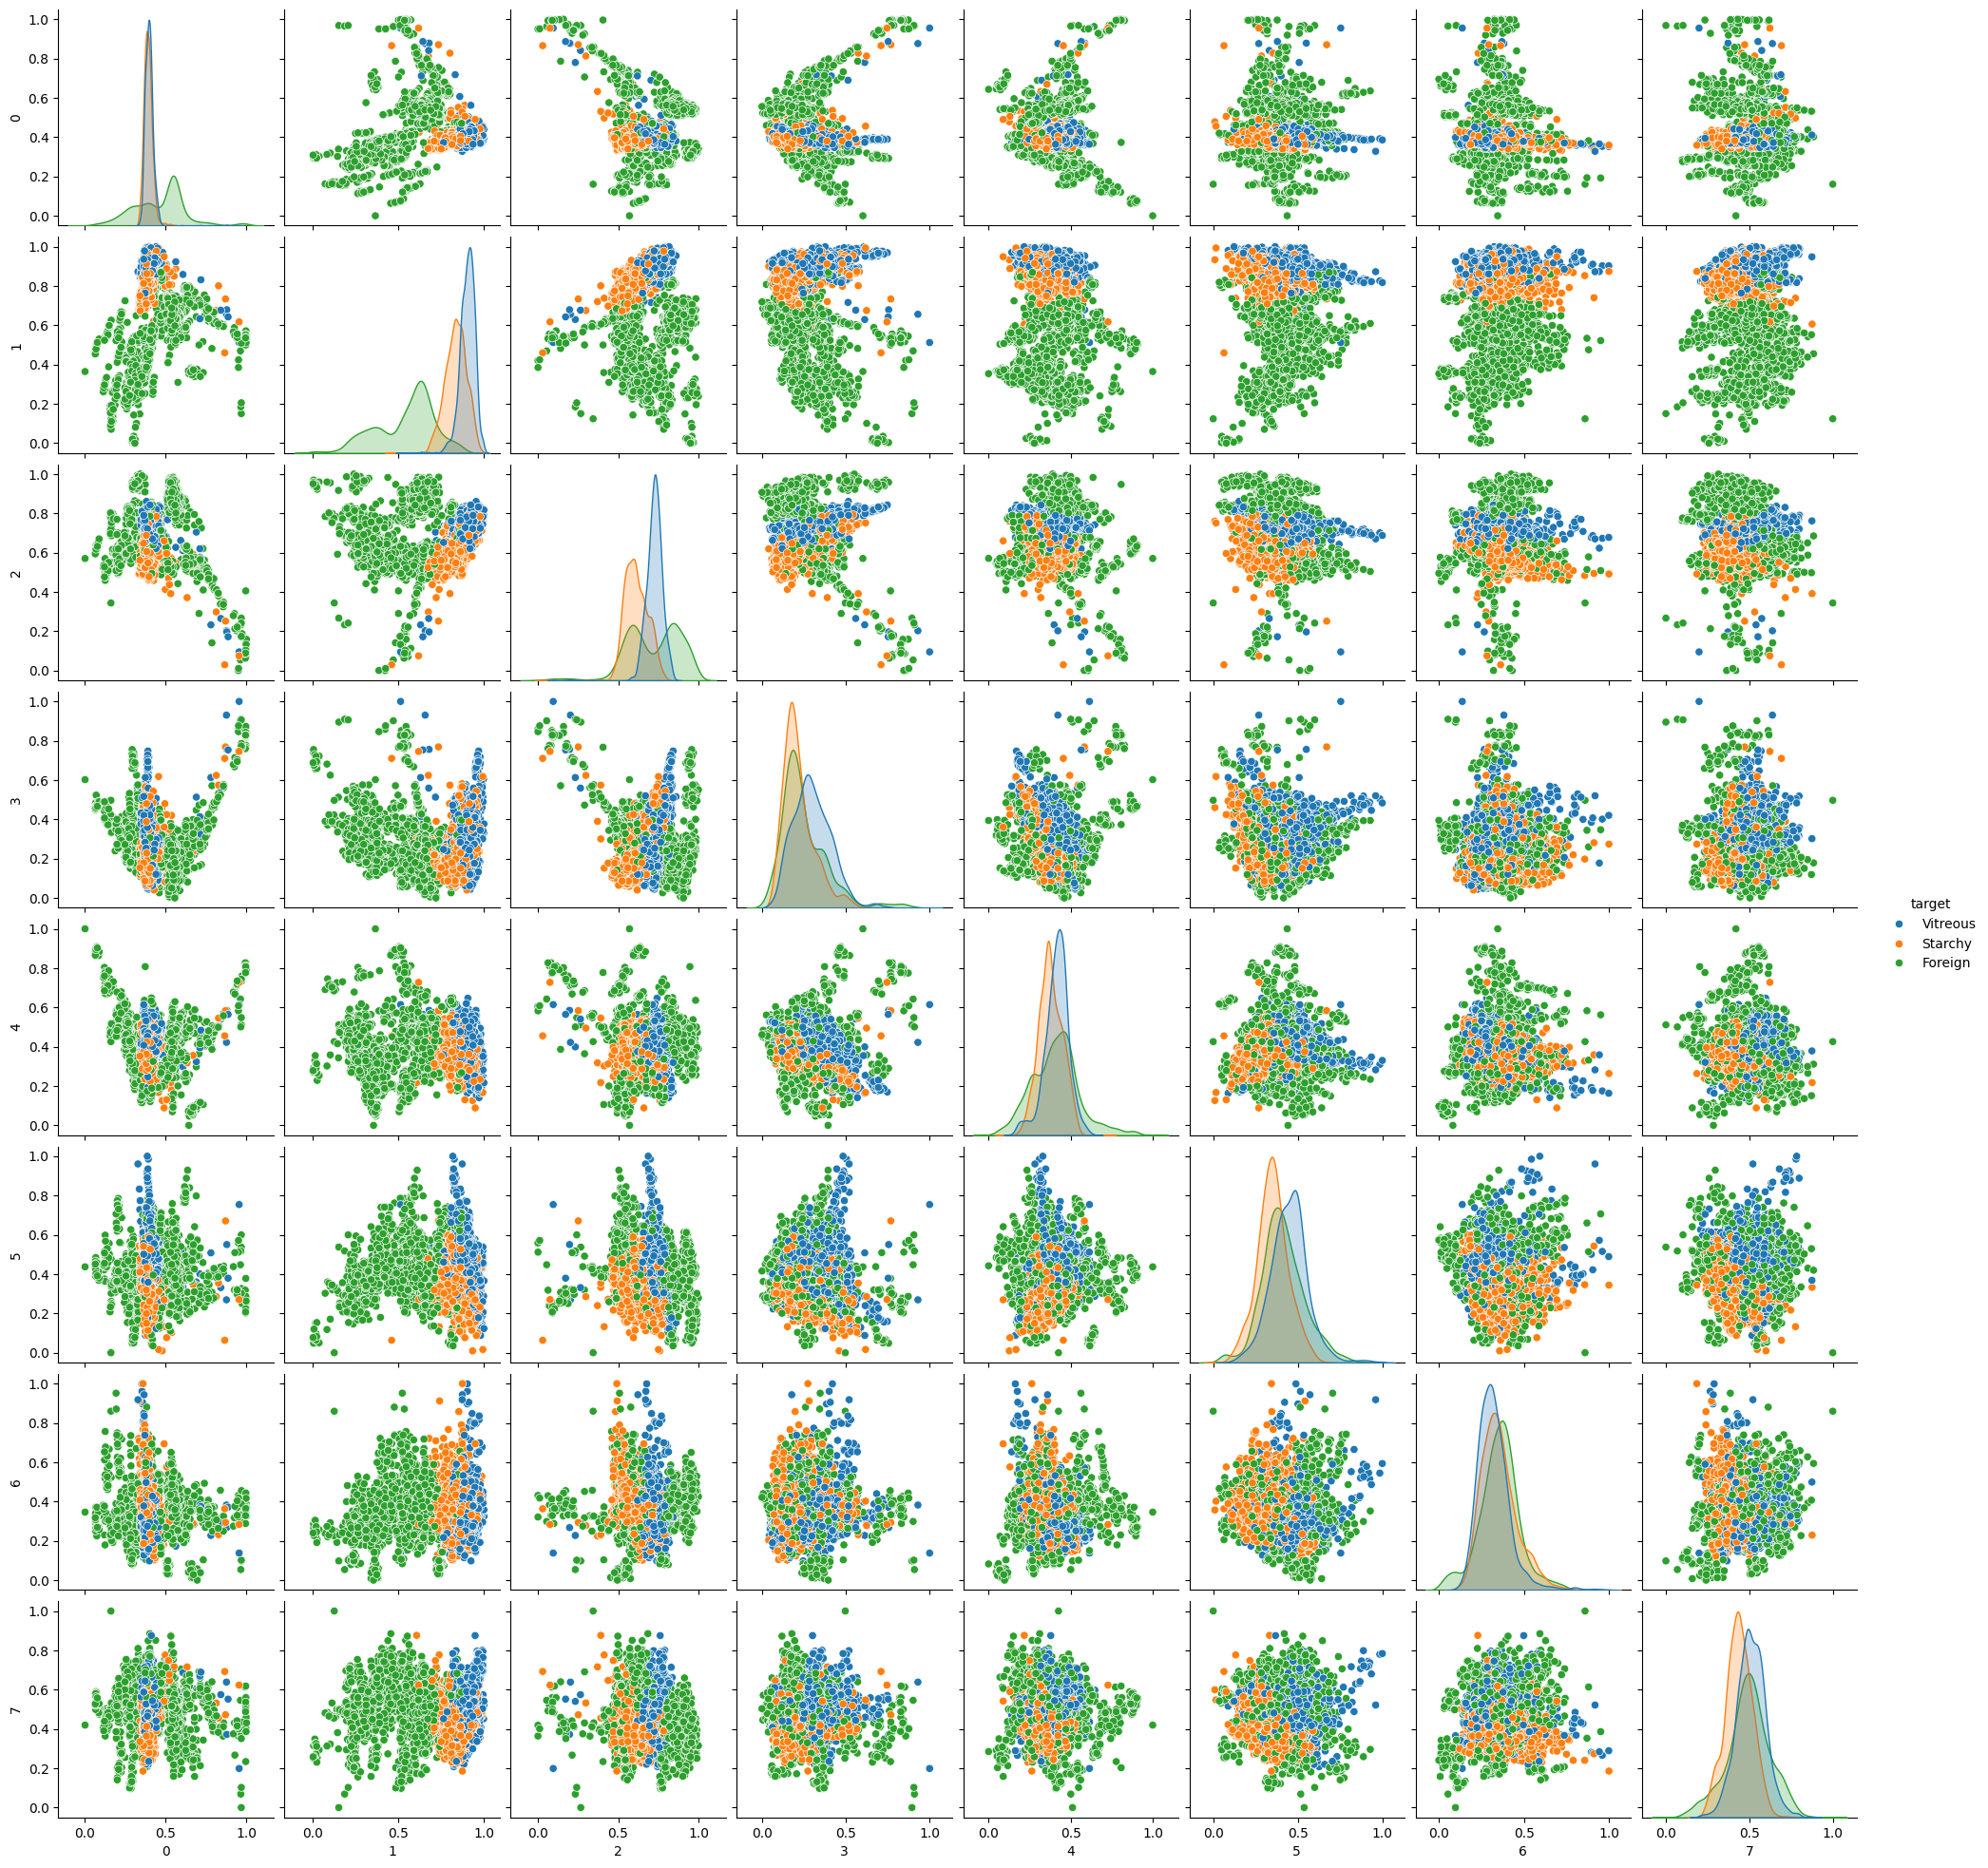

In [7]:
import seaborn as sns

#print(df_red)
Z=X_train_reduced.copy()
Z['target']=pd.DataFrame(data=y_encoder.inverse_transform(y_train))
print(Z.head())

sns.pairplot(data=Z,hue='target')

   -----> MultNB <-----   


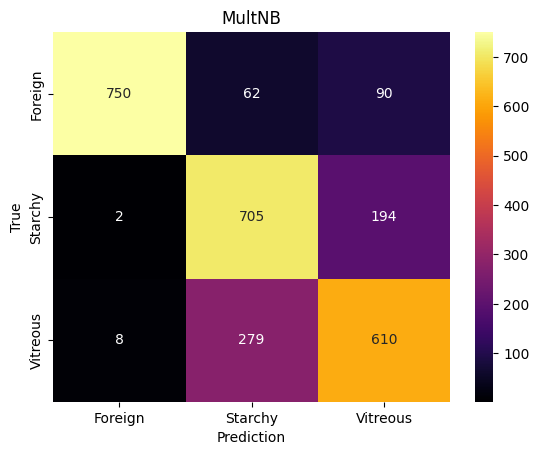

accuracy=76.48
              precision    recall  f1-score   support

     Foreign       0.99      0.83      0.90       902
     Starchy       0.67      0.78      0.72       901
    Vitreous       0.68      0.68      0.68       897

    accuracy                           0.76      2700
   macro avg       0.78      0.76      0.77      2700
weighted avg       0.78      0.76      0.77      2700


 
 

   -----> GaussNB <-----   


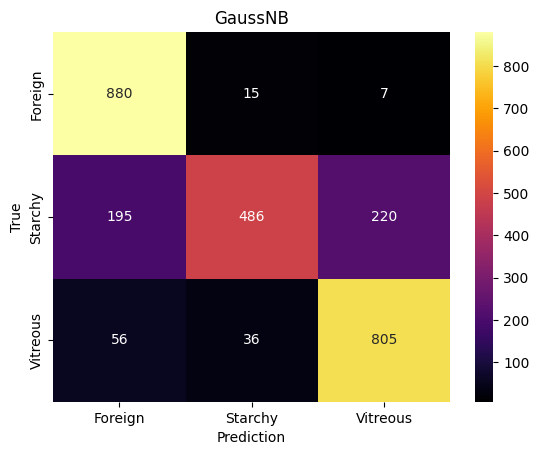

accuracy=80.41
              precision    recall  f1-score   support

     Foreign       0.78      0.98      0.87       902
     Starchy       0.91      0.54      0.68       901
    Vitreous       0.78      0.90      0.83       897

    accuracy                           0.80      2700
   macro avg       0.82      0.80      0.79      2700
weighted avg       0.82      0.80      0.79      2700


 
 

   -----> SVC <-----   


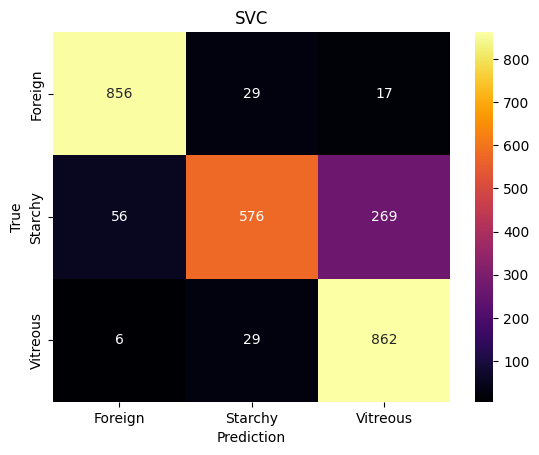

accuracy=84.96
              precision    recall  f1-score   support

     Foreign       0.93      0.95      0.94       902
     Starchy       0.91      0.64      0.75       901
    Vitreous       0.75      0.96      0.84       897

    accuracy                           0.85      2700
   macro avg       0.86      0.85      0.84      2700
weighted avg       0.86      0.85      0.84      2700


 
 

   -----> LogReg <-----   


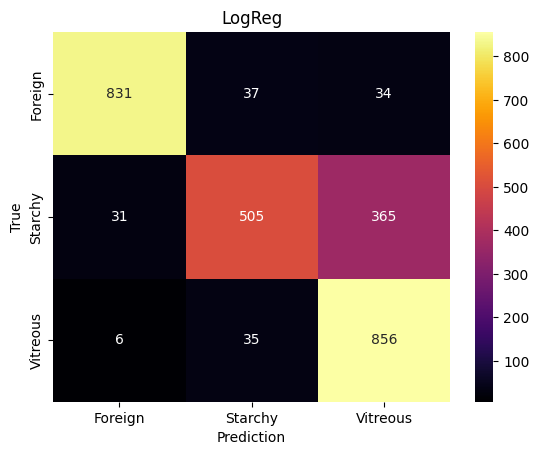

accuracy=81.19
              precision    recall  f1-score   support

     Foreign       0.96      0.92      0.94       902
     Starchy       0.88      0.56      0.68       901
    Vitreous       0.68      0.95      0.80       897

    accuracy                           0.81      2700
   macro avg       0.84      0.81      0.81      2700
weighted avg       0.84      0.81      0.81      2700


 
 

   -----> KNeigh <-----   


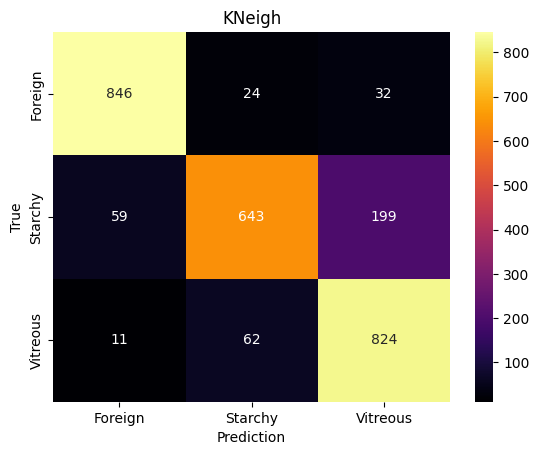

accuracy=85.67
              precision    recall  f1-score   support

     Foreign       0.92      0.94      0.93       902
     Starchy       0.88      0.71      0.79       901
    Vitreous       0.78      0.92      0.84       897

    accuracy                           0.86      2700
   macro avg       0.86      0.86      0.85      2700
weighted avg       0.86      0.86      0.85      2700


 
 

   -----> DecTree <-----   


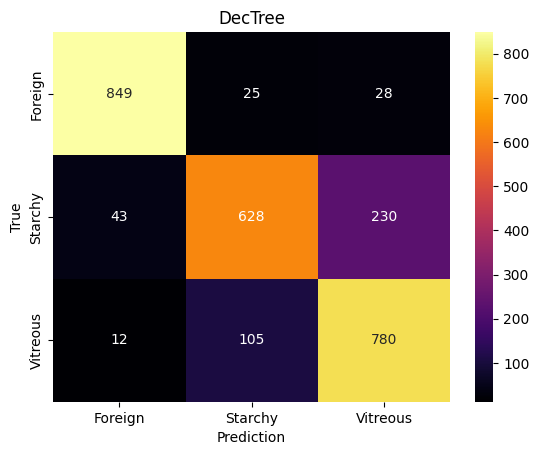

accuracy=83.59
              precision    recall  f1-score   support

     Foreign       0.94      0.94      0.94       902
     Starchy       0.83      0.70      0.76       901
    Vitreous       0.75      0.87      0.81       897

    accuracy                           0.84      2700
   macro avg       0.84      0.84      0.83      2700
weighted avg       0.84      0.84      0.83      2700


 
 

   -----> GradBoost <-----   


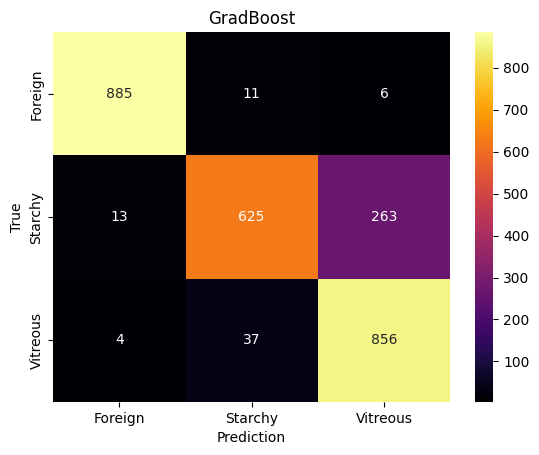

accuracy=87.63
              precision    recall  f1-score   support

     Foreign       0.98      0.98      0.98       902
     Starchy       0.93      0.69      0.79       901
    Vitreous       0.76      0.95      0.85       897

    accuracy                           0.88      2700
   macro avg       0.89      0.88      0.87      2700
weighted avg       0.89      0.88      0.87      2700


 
 

   -----> RandForest <-----   


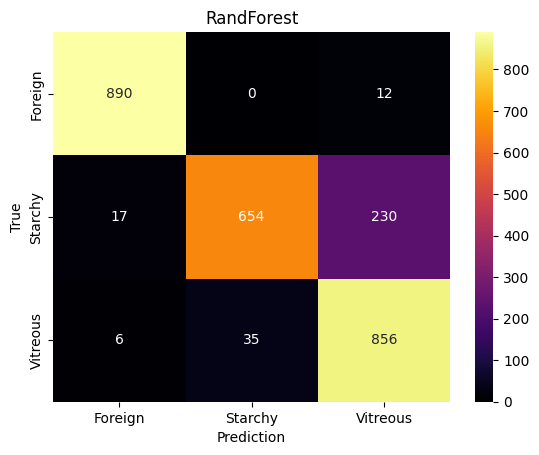

accuracy=88.89
              precision    recall  f1-score   support

     Foreign       0.97      0.99      0.98       902
     Starchy       0.95      0.73      0.82       901
    Vitreous       0.78      0.95      0.86       897

    accuracy                           0.89      2700
   macro avg       0.90      0.89      0.89      2700
weighted avg       0.90      0.89      0.89      2700


 
 



In [8]:
#Model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt


ClassifierS={'MultNB':MultinomialNB(),
            'GaussNB':GaussianNB(),
            'SVC':SVC(random_state=0),#support vector classification
            'LogReg':LogisticRegression(random_state=0),
            'KNeigh':KNeighborsClassifier(n_neighbors=3),
            'DecTree':DecisionTreeClassifier(random_state=0),
            'GradBoost':GradientBoostingClassifier(random_state=0),
            'RandForest':RandomForestClassifier(random_state=0)
}


classes=y_encoder.inverse_transform(y_test)#.unique()
classes=list(set(classes)) #get unique
classes.sort()

def show_confusion(y_test,y_predict,classes,key):
    '''
    Show confusion matrix and classification error for a given prediction (= classification here)
    '''

    cm = confusion_matrix(y_test, y_predic)
    #fig,ax=plt.subplots(2,3,figsize)
    ax=sns.heatmap(cm,annot=True,cmap='inferno',fmt='g',xticklabels=classes,yticklabels=classes)
    ax.set(xlabel='Prediction',ylabel='True')
    ax.set(title=key)

    acc='{:.2f}'.format(accuracy_score(y_test,y_predic)*100 )  
    report=classification_report(y_test, y_predic,target_names=classes,output_dict=False)

    print('   -----> '+key+' <-----   ')
    plt.show()
    print('accuracy='+acc)
    print(report)
    print('\n \n \n')


#i=0
for key in ClassifierS.keys():
   # i=i+1
    classifier=ClassifierS[key]

    classifier.fit(X_train_reduced, y_train)
    y_predic=classifier.predict(X_test_reduced)
    
    show_confusion(y_test,y_predic,classes,key)
#fig.show()    


In [9]:


#'bad' recall for Starchy grain, forein and vitreous are sometimes identified as Starchy
#'macro avg=unweigthed by ncase in a given label

from sklearn.model_selection import GridSearchCV

tooptimize=['SVC','KNeigh','GradBoost','RandForest']

param_grid=dict()
param_grid['SVC'] = {'C': [0.1, 1, 10, 100] , #inverse of l2 regularization strength
                     'gamma': [0.1, 0.01, 0.001], # kernel coefficient in 1/nfeature/Xvar
                     'kernel': ['rbf','poly'] # the normal SVC;
                    } 

param_grid['KNeigh'] = {'n_neighbors':[3,5,7,9],
                        'weights':['uniform','distance'],
                        'p':[1,2]
                        }

param_grid['GradBoost'] = {'learning_rate':[0.1,0.01,0.001],
                          'criterion':['friedman_mse', 'squared_error']
                          }

param_grid['RandForest'] = {'criterion':['gini', 'entropy', 'log_loss'],
                           'min_samples_leaf':[1,5,10],
                           'max_features':['sqrt','log2']
                           }




GS=dict()
for key in tooptimize:
    estimator=ClassifierS[key]
    params=param_grid[key]
    gs=GridSearchCV(estimator,params,cv=5)
    gs.fit(X_train_reduced,y_train)
    GS[key]=gs
    print(key)
    print('best score: '+str(gs.best_score_*100)+'%' )




SVC
best score: 92.74603174603175%
KNeigh
best score: 98.80952380952381%
GradBoost
best score: 95.19047619047619%
RandForest
best score: 98.07936507936506%


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1, random_state=0)
   -----> SVC <-----   


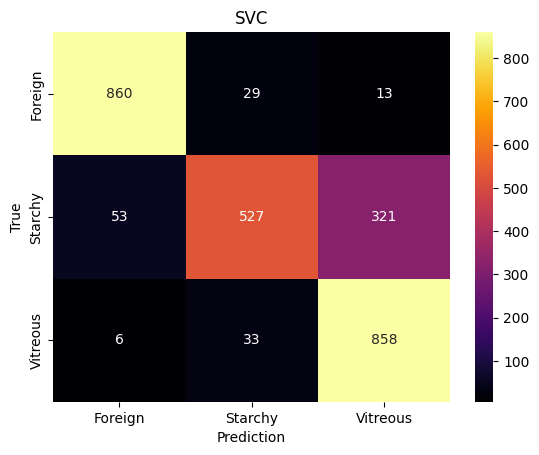

accuracy=83.15
              precision    recall  f1-score   support

     Foreign       0.94      0.95      0.94       902
     Starchy       0.89      0.58      0.71       901
    Vitreous       0.72      0.96      0.82       897

    accuracy                           0.83      2700
   macro avg       0.85      0.83      0.82      2700
weighted avg       0.85      0.83      0.82      2700


 
 

{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
   -----> KNeigh <-----   


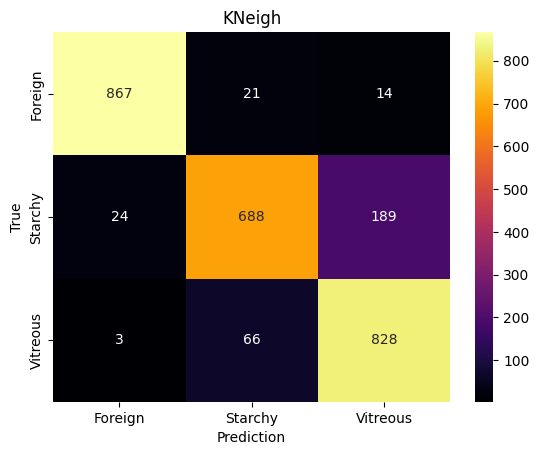

accuracy=88.26
              precision    recall  f1-score   support

     Foreign       0.97      0.96      0.97       902
     Starchy       0.89      0.76      0.82       901
    Vitreous       0.80      0.92      0.86       897

    accuracy                           0.88      2700
   macro avg       0.89      0.88      0.88      2700
weighted avg       0.89      0.88      0.88      2700


 
 

{'criterion': 'friedman_mse', 'learning_rate': 0.1}
GradientBoostingClassifier(random_state=0)
   -----> GradBoost <-----   


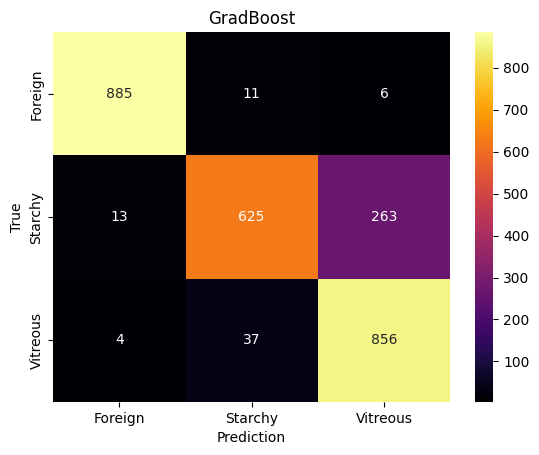

accuracy=87.63
              precision    recall  f1-score   support

     Foreign       0.98      0.98      0.98       902
     Starchy       0.93      0.69      0.79       901
    Vitreous       0.76      0.95      0.85       897

    accuracy                           0.88      2700
   macro avg       0.89      0.88      0.87      2700
weighted avg       0.89      0.88      0.87      2700


 
 

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 1}
RandomForestClassifier(criterion='entropy', max_features='log2', random_state=0)
   -----> RandForest <-----   


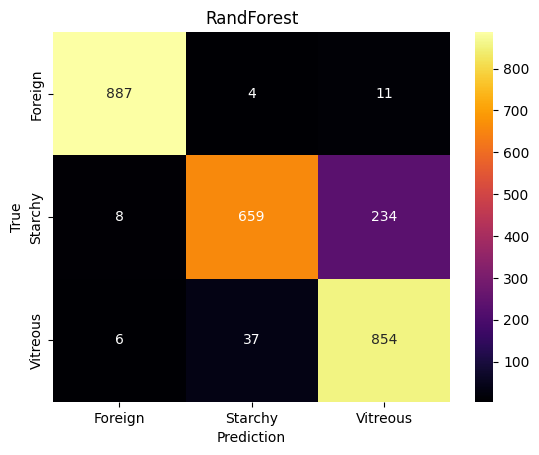

accuracy=88.89
              precision    recall  f1-score   support

     Foreign       0.98      0.98      0.98       902
     Starchy       0.94      0.73      0.82       901
    Vitreous       0.78      0.95      0.86       897

    accuracy                           0.89      2700
   macro avg       0.90      0.89      0.89      2700
weighted avg       0.90      0.89      0.89      2700


 
 



In [10]:

### make the classication with the best params
for key in tooptimize:
    params=GS[key].best_params_
    #print(params)
   # classifier=ClassifierS[key]
   # for ckey in params.keys():
   #     classifier.ckey=params[ckey]

   # classifier.set_params=params
    classifier=GS[key].best_estimator_
    print(params)
    print(classifier)
    model=classifier.fit(X_train_reduced,y_train)
    y_predic=model.predict(X_test_reduced)

    show_confusion(y_test,y_predic,classes,key)




#GS['KNeigh'].best_params_
#GS['RandForest'].best_params_


In [11]:
len(y_test)
len(y_test[y_test==2])

897

In [12]:
# Using PCA space, 
##two best are
# Kneighbor 
# Random Forest (Grad Boost is close too)
# 
# 
# Now try a neuronal network 
# 

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
#from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam


alpha=1e-3 

tf.keras.backend.clear_session() #clear keras session

model=Sequential([
    Input(shape=(X_train_reduced.shape[1],)),
    Dense(units=64,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=len(classes),activation='linear')
],name='mymodel')

model.summary()




Model: "mymodel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,931 (19.26 KB)

 Trainable params: 4,931 (19.26 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#note : 'from_logits=True' is needed to compute loss/error here because Neural network end activation is linear and not Softmax!

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=alpha),
    metrics=['accuracy']
    )


history = model.fit(X_train_reduced,y_train,epochs=40,validation_split=0.2) 


Epoch 1/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6300 - loss: 0.9612 - val_accuracy: 0.8175 - val_loss: 0.5271
Epoch 2/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8035 - loss: 0.5094 - val_accuracy: 0.8444 - val_loss: 0.3901
Epoch 3/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.4058 - val_accuracy: 0.8683 - val_loss: 0.3362
Epoch 4/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3797 - val_accuracy: 0.8786 - val_loss: 0.2926
Epoch 5/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.3348 - val_accuracy: 0.8873 - val_loss: 0.2692
Epoch 6/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss: 0.2991 - val_accuracy: 0.8984 - val_loss: 0.2448
Epoch 7/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8796 - loss: 0.2962 - val_accuracy: 0.9206 - val_loss: 0.2203
Epoch 8/40
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8912 - loss: 0.2719 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


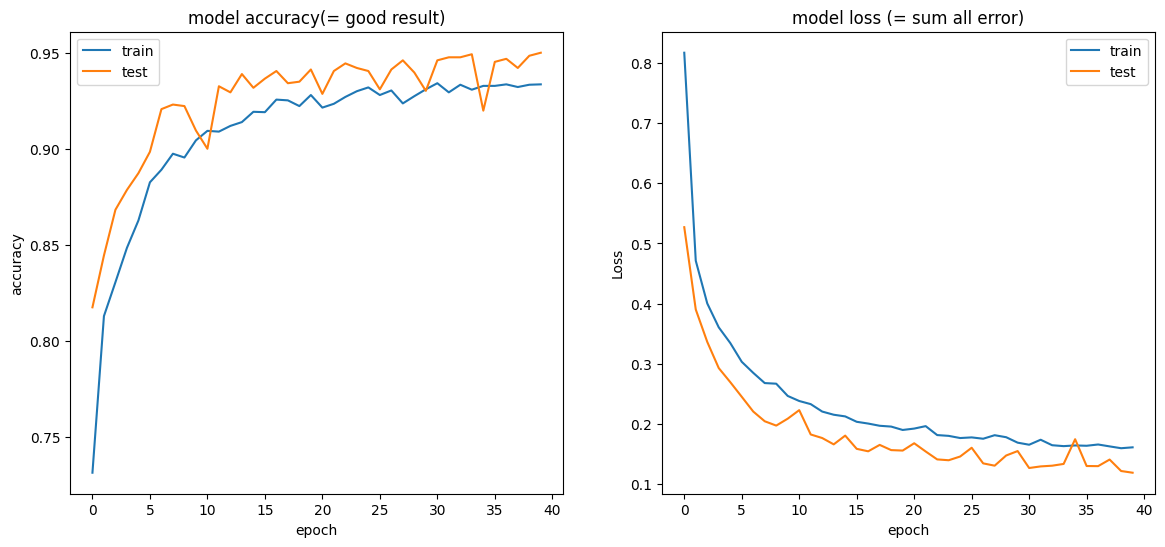

In [14]:
print(history.history.keys())

#notes : 3 classes -> accuracy is not 1- loss!  you have 1 chance to be correct, but 2 to be wrong!

fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy(= good result)')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'])


ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss (= sum all error)')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'])

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
   -----> Neural Network <-----   


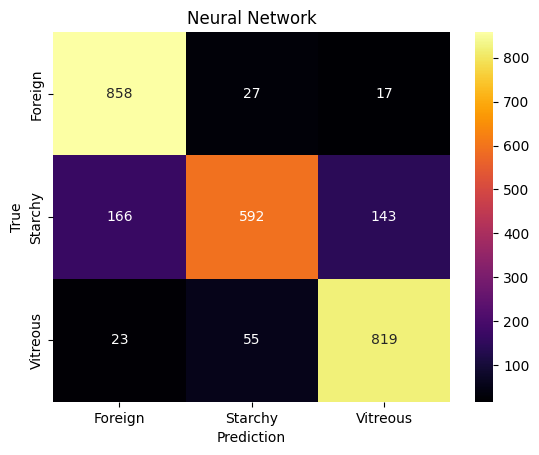

accuracy=84.04
              precision    recall  f1-score   support

     Foreign       0.82      0.95      0.88       902
     Starchy       0.88      0.66      0.75       901
    Vitreous       0.84      0.91      0.87       897

    accuracy                           0.84      2700
   macro avg       0.84      0.84      0.84      2700
weighted avg       0.84      0.84      0.84      2700


 
 


 
 



In [15]:
#Xtest is for testing generalisation

output=model.predict(X_test_reduced) # 
proba = tf.nn.softmax(output) #here is softmax ;

y_predic=np.argmax(proba,axis=1) # select max proba between possible classes (in colon)


show_confusion(y_test,y_predic,classes,'Neural Network')
print('\n \n \n')


In [16]:
# With a simple neural network,  classification of Starchy  wheat remains a problem

